In [1]:
import pandas as pd
import numpy as np
import collections

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [2]:
train = pd.read_csv('train.csv')
train

,pair_id,name_1,name_2,is_duplicate
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0
2,3,"Rishichem Distributors Pvt., Ltd.",Dsa,0
3,4,Powermax Rubber Factory,Co. One,0
4,5,Tress A/S,Longyou Industries Park Zhejiang,0
...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0


In [3]:
def compute_tf(text):
    tf_text = collections.Counter(text)
    for i in tf_text:
        tf_text[i] = tf_text[i]/float(len(text))
    return tf_text

In [4]:
def counter(idf_dictionary, list2):
    counter, length = 0, 0
    for word in idf_dictionary:
        length += idf_dictionary[word]
        if word in list2:
            counter += idf_dictionary[word]
    return counter/length

In [5]:
train_data = train

train_data['name_1_list'] = train_data['name_1'].str.replace(r'[^\w\s]+', '').str.lower().str.split()
train_data['name_2_list'] = train_data['name_2'].str.replace(r'[^\w\s]+', '').str.lower().str.split()

is_duplicate = train_data.pop('is_duplicate')
train_data.insert(len(train_data.columns), 'is_duplicate', is_duplicate)

train_data

C:\Users\7A4E~1\AppData\Local\Temp/ipykernel_1480/1214456815.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['name_1_list'] = train_data['name_1'].str.replace(r'[^\w\s]+', '').str.lower().str.split()
C:\Users\7A4E~1\AppData\Local\Temp/ipykernel_1480/1214456815.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['name_2_list'] = train_data['name_2'].str.replace(r'[^\w\s]+', '').str.lower().str.split()


,pair_id,name_1,name_2,name_1_list,name_2_list,is_duplicate
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.","[iko, industries, ltd]","[enormous, industrial, trade, pvt, ltd]",0
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,"[apcotex, industries, ltd]","[technocraft, industries, india, ltd]",0
2,3,"Rishichem Distributors Pvt., Ltd.",Dsa,"[rishichem, distributors, pvt, ltd]",[dsa],0
3,4,Powermax Rubber Factory,Co. One,"[powermax, rubber, factory]","[co, one]",0
4,5,Tress A/S,Longyou Industries Park Zhejiang,"[tress, as]","[longyou, industries, park, zhejiang]",0
...,...,...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,"[bitmat, products]","[the, goodyear, tire, and, rubber, company]",0
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,"[bnd, trading, co, ltd]","[zhong, shan, yue, liang, economy, trade, imp,...",0
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City","[xeikon, industrial, co, ltd, of, dongguan, city]","[yi, cheng, trading, co, ltd, of, dongguan, city]",0
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,"[shanghai, kechuan, trading, co, ltd]","[shanghai, mg, stationery, inc]",0


In [6]:
corpus1 = train_data["name_1_list"].tolist()
corpus2 = train_data["name_2_list"].tolist()

corpus_name = []
for name in corpus1:
    corpus_name.extend(name)
for name in corpus2:
    corpus_name.extend(name)    
    
tf_name = compute_tf(corpus_name)
tf_name

Counter({'iko': 0.0003050301658921795,
         'industries': 0.018474687350822448,
         'ltd': 0.07483083097121497,
         'apcotex': 0.0001162404964628907,
         'rishichem': 1.2675877804537964e-05,
         'distributors': 0.0002206142137045118,
         'pvt': 0.01149594237060491,
         'powermax': 1.1057680638001202e-05,
         'rubber': 0.010603506633259886,
         'factory': 0.00030745746164198464,
         'tress': 6.52672857169827e-05,
         'as': 0.0009555454268399576,
         'wpt': 4.018522963566291e-05,
         'mexico': 0.005952807976633233,
         'sa': 0.01742744408454541,
         'de': 0.024545084321557352,
         'cv': 0.012511630792134482,
         'national': 0.0004975956287100542,
         'bank': 0.0013061548129229227,
         'of': 0.0017805562822459497,
         'citibank': 1.2406178276781837e-05,
         'korea': 9.547363282566893e-05,
         'inc': 0.026435678011127804,
         'prettl': 4.8545914996102845e-06,
         'electric

In [7]:
def compute_idf(text, tf_name=tf_name):
    idf_dictionary = {}
    for word in text:
        idf_dictionary[word] = round(1/tf_name[word], 1)
    return idf_dictionary

In [8]:
train_data['idf_name_1'] = train_data['name_1_list'].apply(compute_idf)
train_data['idf_name_2'] = train_data['name_2_list'].apply(compute_idf)

train_data['name_1_match'] = train_data.apply(lambda x: counter(x.idf_name_1, x.name_2_list), axis=1)
train_data['name_2_match'] = train_data.apply(lambda x: counter(x.idf_name_2, x.name_1_list), axis=1)

train_data['name_match'] = (train_data['name_1_match'] + train_data['name_2_match'])/2

train_data

,pair_id,name_1,name_2,name_1_list,name_2_list,is_duplicate,idf_name_1,idf_name_2,name_1_match,name_2_match,name_match
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.","[iko, industries, ltd]","[enormous, industrial, trade, pvt, ltd]",0,"{'iko': 3278.4, 'industries': 54.1, 'ltd': 13.4}","{'enormous': 40302.5, 'industrial': 182.6, 'tr...",0.004005,0.000327,0.002166
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,"[apcotex, industries, ltd]","[technocraft, industries, india, ltd]",0,"{'apcotex': 8602.9, 'industries': 54.1, 'ltd':...","{'technocraft': 29662.6, 'industries': 54.1, '...",0.007785,0.002263,0.005024
2,3,"Rishichem Distributors Pvt., Ltd.",Dsa,"[rishichem, distributors, pvt, ltd]",[dsa],0,"{'rishichem': 78890.0, 'distributors': 4532.8,...",{'dsa': 2107.9},0.000000,0.000000,0.000000
3,4,Powermax Rubber Factory,Co. One,"[powermax, rubber, factory]","[co, one]",0,"{'powermax': 90434.9, 'rubber': 94.3, 'factory...","{'co': 23.0, 'one': 1456.9}",0.000000,0.000000,0.000000
4,5,Tress A/S,Longyou Industries Park Zhejiang,"[tress, as]","[longyou, industries, park, zhejiang]",0,"{'tress': 15321.6, 'as': 1046.5}","{'longyou': 36351.3, 'industries': 54.1, 'park...",0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,"[bitmat, products]","[the, goodyear, tire, and, rubber, company]",0,"{'bitmat': 16334.1, 'products': 166.7}","{'the': 675.7, 'goodyear': 4017.2, 'tire': 929...",0.000000,0.000000,0.000000
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,"[bnd, trading, co, ltd]","[zhong, shan, yue, liang, economy, trade, imp,...",0,"{'bnd': 17165.9, 'trading': 66.3, 'co': 23.0, ...","{'zhong': 27263.5, 'shan': 5296.9, 'yue': 9914...",0.002108,0.000406,0.001257
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City","[xeikon, industrial, co, ltd, of, dongguan, city]","[yi, cheng, trading, co, ltd, of, dongguan, city]",0,"{'xeikon': 66211.2, 'industrial': 182.6, 'co':...","{'yi': 3628.0, 'cheng': 5444.7, 'trading': 66....",0.028508,0.175724,0.102116
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,"[shanghai, kechuan, trading, co, ltd]","[shanghai, mg, stationery, inc]",0,"{'shanghai': 168.0, 'kechuan': 41198.1, 'tradi...","{'shanghai': 168.0, 'mg': 10186.3, 'stationery...",0.004051,0.006707,0.005379


<AxesSubplot:xlabel='is_duplicate', ylabel='name_match'>

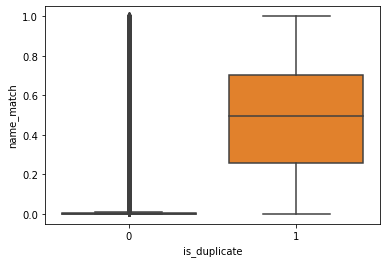

In [9]:
sns.boxplot(data=train_data, x="is_duplicate", y="name_match")

In [10]:
name_1_match_mean = train_data['name_1_match'].mean()
name_2_match_mean = train_data['name_2_match'].mean()

In [11]:
f1_low = []

duplicate = train_data['is_duplicate']

for i in range(1001):
    train_data['is_duplicate_predict'] = np.where(
        ((train_data['name_1_match'] > name_1_match_mean) & (train_data['name_2_match'] > i/1000)) |
        ((train_data['name_2_match'] > name_2_match_mean) & (train_data['name_1_match'] > i/1000)), 1, 0)

    duplicate_predict = train_data['is_duplicate_predict']
    f1_low.append(f1_score(duplicate, duplicate_predict))

f1_low_float = f1_low.index(max(f1_low))/1000
f1_low_float

0.59

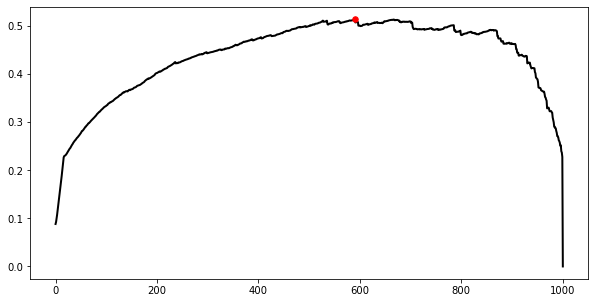

In [12]:
fig = plt.figure (figsize=(10, 5))
ax = plt.axes()

plt.plot(f1_low, linewidth=2.0, c="black", zorder=0)
ax.scatter (f1_low_float*1000, max(f1_low), s=30, c="red", zorder=1)

plt.show()

In [13]:
f1_high = []

for i in range(1001):
    train_data['is_duplicate_predict'] = np.where(
        ((train_data['name_1_match'] > i/1000) & (train_data['name_2_match'] > f1_low_float)) |
        ((train_data['name_2_match'] > i/1000) & (train_data['name_1_match'] > f1_low_float)), 1, 0)

    duplicate_predict = train_data['is_duplicate_predict']
    f1_high.append(f1_score(duplicate, duplicate_predict))
    
f1_high_float = f1_high.index(max(f1_high))/1000
f1_high_float

0.036

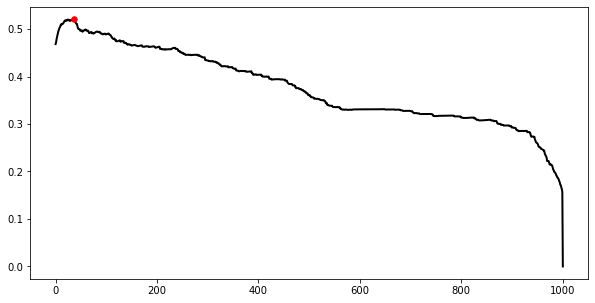

In [14]:
fig = plt.figure (figsize=(10, 5))
ax = plt.axes()

plt.plot(f1_high, linewidth=2.0, c="black", zorder=0)
ax.scatter (f1_high_float*1000, max(f1_high), s=30, c="red", zorder=1)

plt.show()

In [15]:
train_data['is_duplicate_predict'] = np.where(
    ((train_data['name_1_match'] > f1_high_float) & (train_data['name_2_match'] > f1_low_float)) |
    ((train_data['name_2_match'] > f1_high_float) & (train_data['name_1_match'] > f1_low_float)), 1, 0)

train_data

,pair_id,name_1,name_2,name_1_list,name_2_list,is_duplicate,idf_name_1,idf_name_2,name_1_match,name_2_match,name_match,is_duplicate_predict
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.","[iko, industries, ltd]","[enormous, industrial, trade, pvt, ltd]",0,"{'iko': 3278.4, 'industries': 54.1, 'ltd': 13.4}","{'enormous': 40302.5, 'industrial': 182.6, 'tr...",0.004005,0.000327,0.002166,0
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,"[apcotex, industries, ltd]","[technocraft, industries, india, ltd]",0,"{'apcotex': 8602.9, 'industries': 54.1, 'ltd':...","{'technocraft': 29662.6, 'industries': 54.1, '...",0.007785,0.002263,0.005024,0
2,3,"Rishichem Distributors Pvt., Ltd.",Dsa,"[rishichem, distributors, pvt, ltd]",[dsa],0,"{'rishichem': 78890.0, 'distributors': 4532.8,...",{'dsa': 2107.9},0.000000,0.000000,0.000000,0
3,4,Powermax Rubber Factory,Co. One,"[powermax, rubber, factory]","[co, one]",0,"{'powermax': 90434.9, 'rubber': 94.3, 'factory...","{'co': 23.0, 'one': 1456.9}",0.000000,0.000000,0.000000,0
4,5,Tress A/S,Longyou Industries Park Zhejiang,"[tress, as]","[longyou, industries, park, zhejiang]",0,"{'tress': 15321.6, 'as': 1046.5}","{'longyou': 36351.3, 'industries': 54.1, 'park...",0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,"[bitmat, products]","[the, goodyear, tire, and, rubber, company]",0,"{'bitmat': 16334.1, 'products': 166.7}","{'the': 675.7, 'goodyear': 4017.2, 'tire': 929...",0.000000,0.000000,0.000000,0
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,"[bnd, trading, co, ltd]","[zhong, shan, yue, liang, economy, trade, imp,...",0,"{'bnd': 17165.9, 'trading': 66.3, 'co': 23.0, ...","{'zhong': 27263.5, 'shan': 5296.9, 'yue': 9914...",0.002108,0.000406,0.001257,0
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City","[xeikon, industrial, co, ltd, of, dongguan, city]","[yi, cheng, trading, co, ltd, of, dongguan, city]",0,"{'xeikon': 66211.2, 'industrial': 182.6, 'co':...","{'yi': 3628.0, 'cheng': 5444.7, 'trading': 66....",0.028508,0.175724,0.102116,0
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,"[shanghai, kechuan, trading, co, ltd]","[shanghai, mg, stationery, inc]",0,"{'shanghai': 168.0, 'kechuan': 41198.1, 'tradi...","{'shanghai': 168.0, 'mg': 10186.3, 'stationery...",0.004051,0.006707,0.005379,0


<AxesSubplot:>

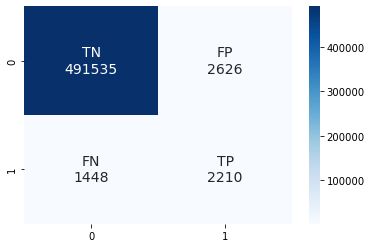

In [16]:
duplicate = train_data['is_duplicate']
duplicate_predict = train_data['is_duplicate_predict']

matrix_1 = confusion_matrix(duplicate, duplicate_predict)

group_names  = ['TN', 'FP', 'FN', 'TP']

group_counts = ["{0:0.0f}".format(value) for value in matrix_1.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(matrix_1, annot=labels, annot_kws={"fontsize":14}, fmt='', cmap='Blues')

In [17]:
print('f1 score', round(f1_score(duplicate, duplicate_predict), 4))
print('accuracy score', round(accuracy_score(duplicate, duplicate_predict), 4))
print('precision score', round(precision_score(duplicate, duplicate_predict), 4))
print('recall score', round(recall_score(duplicate, duplicate_predict), 4))

f1 score 0.5204
accuracy score 0.9918
precision score 0.457
recall score 0.6042


In [18]:
data_result = train_data.drop(columns = ['pair_id',
                                         'name_1_list', 
                                         'name_2_list', 
                                         'idf_name_1',
                                         'idf_name_2',
                                         'name_1_match',
                                         'name_2_match'])

data_result

,name_1,name_2,is_duplicate,name_match,is_duplicate_predict
0,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,0.002166,0
1,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,0.005024,0
2,"Rishichem Distributors Pvt., Ltd.",Dsa,0,0.000000,0
3,Powermax Rubber Factory,Co. One,0,0.000000,0
4,Tress A/S,Longyou Industries Park Zhejiang,0,0.000000,0
...,...,...,...,...,...
497814,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,0.000000,0
497815,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,0.001257,0
497816,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,0.102116,0
497817,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0,0.005379,0


In [19]:
def check_answer(list1, list2):
    check = []
    for i in range(len(list1)):
        if list1[i] == list2[i]:
            check.append(list1[i])
        else:
            check.append('X')
    return check

In [20]:
def precision_at_5(list1, list2):
    count = 0
    for i in range(len(list1)):
        if list1[i] == list2[i]:
            count += 1
    return count/len(list1)

In [21]:
def avg_precision_at_5(list1, list2):
    count = 0
    summary = 0
    for i in range(len(list1)):
        if list1[i] == list2[i]:
            count += 1
            summary += count/(i+1)
    return summary/len(list1)

In [22]:
def matched_names(names_list):
    df = pd.DataFrame()
    for name in names_list:
        predict_1 = data_result[(data_result['name_1'] == name)]

        predict_2 = data_result[(data_result['name_2'] == name)]
        predict_2 = predict_2.rename(columns={'name_1': 'name_2', 'name_2': 'name_1'})

        predict = pd.concat([predict_1, predict_2])
        predict = predict.drop_duplicates()
        sum_duplicate = predict['is_duplicate'].sum()
        predict = predict.nlargest(5, ['name_match'])
        
        find = [name]

        find.append(predict["name_2"].tolist())
        find.append(predict["is_duplicate"].tolist())
        find.append(predict["is_duplicate_predict"].tolist())
        
        is_duplicate_check = []
        for i in range(sum_duplicate):
            is_duplicate_check.append(1)
        for i in range(5-sum_duplicate):
            is_duplicate_check.append(0)
            
        is_duplicate_check = is_duplicate_check[0:len(predict["is_duplicate_predict"].tolist())]
        
        find.append(is_duplicate_check) 

        df_temp = pd.DataFrame(find)
        df_temp = df_temp.transpose()
        df_temp = df_temp.set_axis(['name', 
                                    'matched_names', 
                                    'is_duplicate', 
                                    'is_duplicate_predict', 
                                    'is_duplicate_check'], axis=1)
        
        df_temp['is_duplicate_check'] = df_temp.apply(lambda x: check_answer(x.is_duplicate_check, x.is_duplicate), axis=1)

        df_temp['p@5'] = df_temp.apply(lambda x: precision_at_5(x.is_duplicate_predict, x.is_duplicate_check), axis=1)
        df_temp['ap@5'] = df_temp.apply(lambda x: avg_precision_at_5(x.is_duplicate_predict, x.is_duplicate_check), axis=1)
        
        df = pd.concat([df, df_temp])

    return df

In [23]:
%%time

df_matched_names = matched_names(train_data["name_1"].unique().tolist())
df_matched_names

Wall time: 20min 30s


,name,matched_names,is_duplicate,is_duplicate_predict,is_duplicate_check,p@5,ap@5
0,Iko Industries Ltd.,"[Iko Midwest Inc., Global Rubber Industries Pv...","[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0]",1.0,1.000000
0,Apcotex Industries Ltd.,"[S&A Industries Corp., Service Industries Ltd....","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",1.0,1.000000
0,"Rishichem Distributors Pvt., Ltd.","[Rishichem Mideast Ltd., Unistar Distributors ...","[0, 0, 0, 0, 0]","[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",0.8,0.543333
0,Powermax Rubber Factory,"[Development Rubber Factory Private Ltd., Rubb...","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",1.0,1.000000
0,Tress A/S,"[Longyou Industries Park Zhejiang, Miroad Rubb...","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",1.0,1.000000
...,...,...,...,...,...,...,...
0,"Ddong A Hwa Sung Co., Ltd.","[M2 A, Co. One, Shan Dong Hua Sheng Rubber Co....","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",1.0,1.000000
0,Zeon France,[Zeon Europe Gmbh],[1],[0],[1],0.0,0.000000
0,Kinik Co.,"[Ost Trucking Co. Inc., Izi International, Bro...","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]",1.0,1.000000
0,Pearl Patch,"[Vinmar Plastichem S De Rl De Cv, G.P. (Pvt) L...","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]",1.0,1.000000


In [24]:
mean_avg_precision_at_5  = df_matched_names['ap@5'].mean()
mean_avg_precision_at_5

0.8873478483864308